# IDS Assignment 2
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. 

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file in moodle.

# Preprocessing and Data Quality 


### Question 1 (Order cancellations)
Invoices with a InvoiceNo starting with the letter ‘c’ are order cancellations. Would you recommend keeping the order cancellation in your data set? Also provide a reason for your recommandation. 

Your answer: The first reason is that we don't need the information if an order was cancelled in the following exercises 'clustering' and 'association rules'. The second reason is that it makes no sense keeping the order cancellation because it would distort the results of the 'clustering' and 'association rules' part. Because the orders were cancelled, it is no real data, because it never happened.

In [389]:
#Modify the data set according to your recommendation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import preprocessing

sns.set_palette("deep")
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['grid.color'] = '0.7'
mpl.rcParams['figure.figsize'] = '14, 7'

In [390]:
data = pd.read_excel('Assignment2 Datasets/Online Retail.xlsx')

In [391]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [392]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [393]:
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
rows_deleted = data['InvoiceNo'].str.contains(case=False, pat='c', regex=False)
new_data = data[~rows_deleted]

In [394]:
# Number of rows of the original data set and after removing rows with 'C'
print(data.shape)
print(new_data.shape)

(541909, 8)
(532621, 8)


### Question 2 (Empty values)
The attributes Description and CustomerID contain empty values. The Country attribute contains an “unspecified” value. For each of the three attributes reason how you would handle these values and why. 

Your answer: 

Description: Keep attributes with empty description, because there is also the StockCode that identifies the item. Also there only 1454 rows that have an empty description.

CustomerID: We don't need CustomerID in the following exercises, so we don't have to remove the rows with empty CustomerID. Also there are 134698 rows with empty CustomerID, so if we removed all of them then we would have a noticable smaller data set and we would get different results than with the original data set.

Country: Because we need the Country in the 'visualizations' and 'association rules' part we have to know the Country, so we remove rows with 'Unspecified' country. Also there are only 446 rows with 'Unscpecified' country, so removing these rows doesn't make the data set noticably smaller.

In [395]:
#Modify the data set according to your recommendation
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [396]:
print('Empty Description:', pd.isnull(new_data['Description']).sum())
print('Empty CustomerID:', pd.isnull(new_data['CustomerID']).sum())
print('Unscpecified Country:', new_data[new_data['Country'] == 'Unspecified'].shape[0])

Empty Description: 1454
Empty CustomerID: 134697
Unscpecified Country: 446


In [397]:
print(new_data.shape)
new_data2 = new_data[new_data['Country'] != 'Unspecified']
print(new_data2.shape)

(532621, 8)
(532175, 8)


### Question 3 (Outliers/Noise)
Explore into the attributes Quantity and UnitPrice by plotting each attribute visually. Do these attributes contain noise and/or outliers? If so, reason how you would handle them and modify your data set accordingly.


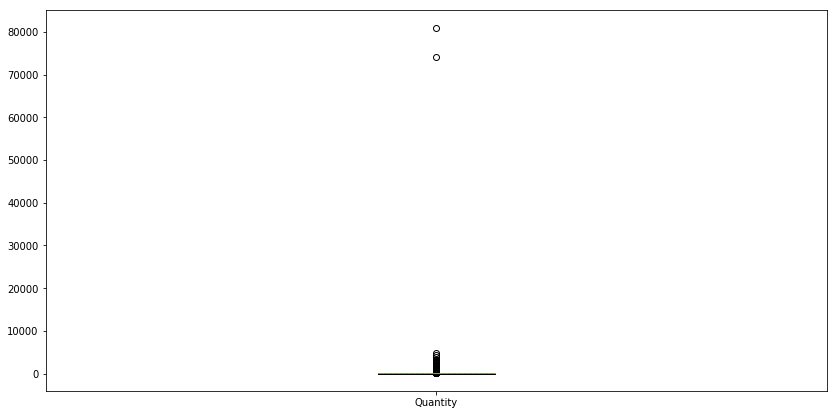

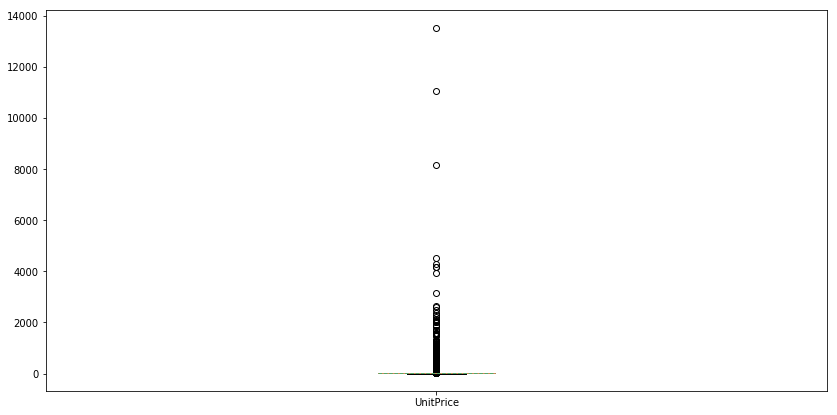

[1.0, 23.0]


,Quantity,UnitPrice,CustomerID
count,435797.000000,435797.000000,320818.000000
mean,4.938458,2.699421,15353.246099
std,4.508547,1.927371,1703.206305
min,1.000000,0.060000,12347.000000
25%,1.000000,1.250000,14049.000000
50%,3.000000,2.080000,15298.000000
75%,8.000000,3.750000,16873.000000
max,23.000000,8.330000,18287.000000


In [398]:
# First we remove all quantities with values < 1 and all prices with values < 0.01.
import matplotlib.pyplot as plt
new_data3 = new_data2[new_data2['Quantity'] > 0]
new_data4 = new_data3[new_data3['UnitPrice'] >= 0.01]

boxplot = plt.boxplot(new_data4['Quantity'], labels=['Quantity'], showmeans=True, meanline=True)
plt.show()
whiskers = [item.get_ydata()[1] for item in boxplot['whiskers']]


boxplot2 = plt.boxplot(new_data4['UnitPrice'], labels=['UnitPrice'], showmeans=True, meanline=True)
plt.show()
whiskers2 = [item.get_ydata()[1] for item in boxplot2['whiskers']]

print(whiskers)

cleanedData = new_data4[(new_data4['Quantity'] >= whiskers[0]) & (new_data4['Quantity'] <= whiskers[1])]
cleaned_data = cleanedData[(cleanedData['UnitPrice'] >= whiskers2[0]) & (cleanedData['UnitPrice'] <= whiskers2[1])]

cleaned_data.describe()

In [399]:
unit_price_array = np.array(cleaned_data['UnitPrice']).reshape(-1,1)
unit_price_array

array([[2.55],
       [3.39],
       [2.75],
       ...,
       [4.15],
       [4.15],
       [4.95]])

In [400]:
max_value_price = np.asscalar(max(unit_price_array))
n_bins = int(np.around(max_value_price / 0.05))
n_bins

167

In [401]:
discretizer = preprocessing.KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy ='uniform')
discretizer.fit(unit_price_array)

KBinsDiscretizer(encode='ordinal', n_bins=167, strategy='uniform')

In [402]:
discretized_data = discretizer.transform(unit_price_array)

#showing the transformed data
print(discretized_data)
print(discretized_data.shape)

#displaying the edges of each bin per attribute
print(discretizer.bin_edges_[0])

[[50.]
 [67.]
 [54.]
 ...
 [82.]
 [82.]
 [98.]]
(435797, 1)
[0.06       0.10952096 0.15904192 0.20856287 0.25808383 0.30760479
 0.35712575 0.40664671 0.45616766 0.50568862 0.55520958 0.60473054
 0.6542515  0.70377246 0.75329341 0.80281437 0.85233533 0.90185629
 0.95137725 1.0008982  1.05041916 1.09994012 1.14946108 1.19898204
 1.24850299 1.29802395 1.34754491 1.39706587 1.44658683 1.49610778
 1.54562874 1.5951497  1.64467066 1.69419162 1.74371257 1.79323353
 1.84275449 1.89227545 1.94179641 1.99131737 2.04083832 2.09035928
 2.13988024 2.1894012  2.23892216 2.28844311 2.33796407 2.38748503
 2.43700599 2.48652695 2.5360479  2.58556886 2.63508982 2.68461078
 2.73413174 2.78365269 2.83317365 2.88269461 2.93221557 2.98173653
 3.03125749 3.08077844 3.1302994  3.17982036 3.22934132 3.27886228
 3.32838323 3.37790419 3.42742515 3.47694611 3.52646707 3.57598802
 3.62550898 3.67502994 3.7245509  3.77407186 3.82359281 3.87311377
 3.92263473 3.97215569 4.02167665 4.0711976  4.12071856 4.17023952
 4

In [403]:
new_price_data = discretizer.inverse_transform(discretized_data)
new_price_data

array([[2.56080838],
       [3.40266467],
       [2.75889222],
       ...,
       [4.14547904],
       [4.14547904],
       [4.93781437]])

In [404]:
new_price_data_round = np.around(new_price_data, decimals=2).reshape(-1)
new_price_data_round

array([2.56, 3.4 , 2.76, ..., 4.15, 4.15, 4.94])

In [405]:
cleaned_data.reset_index(drop=True, inplace=True)

In [406]:
cleaned_data.loc[:, 'UnitPrice'] = pd.Series(new_price_data_round)

/home/philipp/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [407]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.56,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.40,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.76,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.40,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.40,17850.0,United Kingdom


Your explanation: Both attributes 'Quantity' and 'UnitPrice' have outliers. We remove these outliers be removing the values above the upper fence and below the lower fence. Only the attribute 'UnitPrice' has noise. We handle the noise by binning the data.

# Visualization

### Question 4 (Stream graph)
Create a stream graph that visualizes the number  of purchases (invoices) per country over time.

4. (a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland.

In [408]:
#your modification
country_data = cleaned_data[(cleaned_data['Country'] == 'Belgium')
                           | (cleaned_data['Country'] == 'EIRE')
                           | (cleaned_data['Country'] == 'France')
                           | (cleaned_data['Country'] == 'Germany')
                           | (cleaned_data['Country'] == 'Netherlands')
                           | (cleaned_data['Country'] == 'Norway')
                           | (cleaned_data['Country'] == 'Portugal')
                           | (cleaned_data['Country'] == 'Spain')
                           | (cleaned_data['Country'] == 'Switzerland')]

print(country_data.shape)

(25532, 8)


In [409]:
country_data.reset_index(drop=True, inplace=True)
country_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
1,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.83,12583.0,France
2,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.96,12583.0,France
3,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.83,12583.0,France
4,536370,21913,VINTAGE SEASIDE JIGSAW PUZZLES,12,2010-12-01 08:45:00,3.75,12583.0,France


4. (b) Modify the data set such that it shows per month for each country how many purchases were made (i.e. how many invoices were created).

In [410]:
country_data2 = country_data

In [411]:
country_data2['InvoiceDate'] = country_data2['InvoiceDate'].map(lambda x: x.month)

/home/philipp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [412]:
country_data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12,3.75,12583.0,France
1,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12,0.83,12583.0,France
2,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12,2.96,12583.0,France
3,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,12,0.83,12583.0,France
4,536370,21913,VINTAGE SEASIDE JIGSAW PUZZLES,12,12,3.75,12583.0,France


In [413]:
country_data3 = country_data2.groupby(['Country', 'InvoiceDate']).InvoiceNo.nunique()
country_data3

Country      InvoiceDate
Belgium      1               3
             2               8
             3               9
             4               6
             5               8
             6              11
             7               5
             8               8
             9               6
             10             11
             11              9
             12              9
EIRE         1               7
             2              13
             3              19
             4              10
             5              21
             6              23
             7              22
             8              17
             9              33
             10             27
             11             40
             12             26
France       1              25
             2              21
             3              23
             4              11
             5              35
             6              29
                            ..
Portugal     7

In [414]:
country_data4 = country_data3.reset_index()
country_data5 = country_data4.pivot(index='Country', columns='InvoiceDate', values='InvoiceNo')
country_data5.fillna(value=0, inplace=True)
country_data5

InvoiceDate,1,2,3,4,5,6,7,8,9,10,11,12
Country,,,,,,,,,,,,
Belgium,3.0,8.0,9.0,6.0,8.0,11.0,5.0,8.0,6.0,11.0,9.0,9.0
EIRE,7.0,13.0,19.0,10.0,21.0,23.0,22.0,17.0,33.0,27.0,40.0,26.0
France,25.0,21.0,23.0,11.0,35.0,29.0,22.0,24.0,44.0,28.0,62.0,37.0
Germany,31.0,18.0,28.0,20.0,39.0,24.0,30.0,36.0,39.0,54.0,57.0,44.0
Netherlands,3.0,3.0,6.0,1.0,7.0,11.0,1.0,3.0,6.0,6.0,9.0,4.0
Norway,0.0,2.0,3.0,0.0,0.0,3.0,1.0,2.0,6.0,7.0,5.0,5.0
Portugal,4.0,2.0,4.0,2.0,1.0,3.0,3.0,1.0,3.0,7.0,7.0,10.0
Spain,7.0,4.0,7.0,3.0,3.0,8.0,6.0,9.0,8.0,8.0,12.0,5.0
Switzerland,3.0,4.0,2.0,2.0,3.0,4.0,6.0,3.0,5.0,7.0,5.0,2.0


In [415]:
country_data2.shape

(25532, 8)

4. (c) Use the modified data to create a stream graph. 

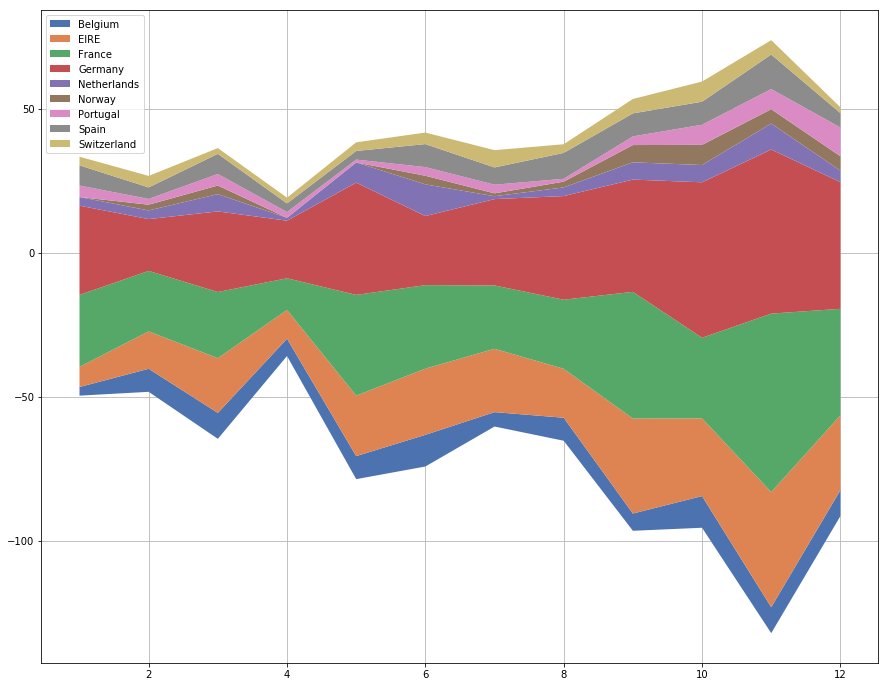

In [416]:
#your code
# the values for our x-axis
x = country_data5.columns.tolist()
# the values that will be stacked on top of each other
y1 = np.array(country_data5.iloc[0, :])
y2 = np.array(country_data5.iloc[1, :])
y3 = np.array(country_data5.iloc[2, :])
y4 = np.array(country_data5.iloc[3, :])
y5 = np.array(country_data5.iloc[4, :])
y6 = np.array(country_data5.iloc[5, :])
y7 = np.array(country_data5.iloc[6, :])
y8 = np.array(country_data5.iloc[7, :])
y9 = np.array(country_data5.iloc[8, :])

# the labels for y1, y2 and y3
labels = country_data5.index.tolist()

#stacking our values vertically
#y = numpy.vstack([y1, y2, y3])

fig, ax = plt.subplots(figsize=(15,12))
#modifying the axis
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels, baseline='wiggle')
ax.legend(loc='upper left')
ax.grid(True)
plt.show()

4. (d) Use this graph to compare the purchases made by each country.

Your answer:

Based on the stream graph you can see that customers of the countries Germany, France and Ireland made by far the most purchases overall. The rest of the countries doesn't made many purchases compared to these countries. For example Norway made no purchases in January and April and May. Belgium, The Netherlands, Portugal, Spain and Switzerland made mostly between 1 and 10 purchases per month.

The most purchases were made in the months of September, October, November and December. Especially for November there is a spike of purchases, more than 200 purchases were made in this month by all countries together. This trend can also be seen if you look at every country specifically. For example if you look at Germany, France and EIRE: they all made the most purchases in November. My guess is that it is probably because of Christmas in December. The online store offers all-occasion gifts, so it makes sense that most of the purchases were made in November, in the month before Christmas. The only two country that doesn't quite follow this trend are the BeNeLux countries Belgium and The Netherlands. They had the most purchases in the month of June.

Another intersting thing you can notice in this graph is that in April there were much less purchases made by all countries. 

### Question 5 (Heat map)
Create a heat map that visualizes how much (in sterling) each country purchases per month. 

5. (a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland. (Or use the version of the data set that you created for question 4 a).

In [417]:
#your modification

country_data6 = cleaned_data[(cleaned_data['Country'] == 'Belgium')
                           | (cleaned_data['Country'] == 'EIRE')
                           | (cleaned_data['Country'] == 'France')
                           | (cleaned_data['Country'] == 'Germany')
                           | (cleaned_data['Country'] == 'Netherlands')
                           | (cleaned_data['Country'] == 'Norway')
                           | (cleaned_data['Country'] == 'Portugal')
                           | (cleaned_data['Country'] == 'Spain')
                           | (cleaned_data['Country'] == 'Switzerland')]

country_data6.shape

(25532, 8)

In [418]:
country_data6.reset_index(drop=True, inplace=True)
country_data6.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
1,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.83,12583.0,France
2,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.96,12583.0,France
3,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.83,12583.0,France
4,536370,21913,VINTAGE SEASIDE JIGSAW PUZZLES,12,2010-12-01 08:45:00,3.75,12583.0,France


5. (b) Modify the data set such that it shows per month how much money (in sterling) was spent in the shop per country.

In [419]:
#your modification
country_data7 = country_data6
country_data7['InvoiceDate'] = country_data7['InvoiceDate'].map(lambda x: x.month)

/home/philipp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [420]:
country_data8 = country_data7.groupby(['Country', 'InvoiceDate']).UnitPrice.sum()
country_data8

Country      InvoiceDate
Belgium      1                96.87
             2               220.70
             3               286.93
             4               227.98
             5               215.14
             6               463.51
             7               210.33
             8               327.86
             9               384.22
             10              567.77
             11              485.18
             12              246.43
EIRE         1               247.34
             2               911.41
             3              1138.45
             4               654.92
             5              1362.70
             6              1133.49
             7              1098.68
             8              1401.05
             9              2463.61
             10             1728.46
             11             2342.22
             12             1483.26
France       1              1252.24
             2               711.35
             3               904.02
   

In [421]:
country_data9 = country_data8.reset_index()
country_data9 = country_data9.pivot(index='Country', columns='InvoiceDate', values='UnitPrice')
country_data9

InvoiceDate,1,2,3,4,5,6,7,8,9,10,11,12
Country,,,,,,,,,,,,
Belgium,96.87,220.70,286.93,227.98,215.14,463.51,210.33,327.86,384.22,567.77,485.18,246.43
EIRE,247.34,911.41,1138.45,654.92,1362.70,1133.49,1098.68,1401.05,2463.61,1728.46,2342.22,1483.26
France,1252.24,711.35,904.02,502.85,1298.20,1059.70,816.86,1027.61,1949.25,1590.93,2895.95,1370.01
Germany,1324.36,586.42,1008.80,910.73,1306.38,1310.00,1370.25,1483.55,1375.26,2398.63,2199.35,1360.29
Netherlands,93.00,57.59,107.14,3.53,156.48,330.99,11.12,119.43,132.95,158.30,143.03,93.43
Norway,NaN,70.28,46.02,NaN,NaN,453.84,82.92,164.33,345.28,255.65,320.48,242.46
Portugal,198.03,155.77,204.32,184.21,153.32,112.90,142.55,24.16,130.10,832.16,304.67,501.21
Spain,923.16,206.87,383.48,202.52,182.14,386.03,316.52,536.07,522.36,508.39,687.87,225.09
Switzerland,232.84,214.93,134.13,163.46,266.73,178.15,467.59,624.60,273.65,673.94,366.41,89.73


In [422]:
country_data9.fillna(value=0, inplace=True)
country_data9

InvoiceDate,1,2,3,4,5,6,7,8,9,10,11,12
Country,,,,,,,,,,,,
Belgium,96.87,220.70,286.93,227.98,215.14,463.51,210.33,327.86,384.22,567.77,485.18,246.43
EIRE,247.34,911.41,1138.45,654.92,1362.70,1133.49,1098.68,1401.05,2463.61,1728.46,2342.22,1483.26
France,1252.24,711.35,904.02,502.85,1298.20,1059.70,816.86,1027.61,1949.25,1590.93,2895.95,1370.01
Germany,1324.36,586.42,1008.80,910.73,1306.38,1310.00,1370.25,1483.55,1375.26,2398.63,2199.35,1360.29
Netherlands,93.00,57.59,107.14,3.53,156.48,330.99,11.12,119.43,132.95,158.30,143.03,93.43
Norway,0.00,70.28,46.02,0.00,0.00,453.84,82.92,164.33,345.28,255.65,320.48,242.46
Portugal,198.03,155.77,204.32,184.21,153.32,112.90,142.55,24.16,130.10,832.16,304.67,501.21
Spain,923.16,206.87,383.48,202.52,182.14,386.03,316.52,536.07,522.36,508.39,687.87,225.09
Switzerland,232.84,214.93,134.13,163.46,266.73,178.15,467.59,624.60,273.65,673.94,366.41,89.73


5. (c) Use the modified data to create a heat map. 

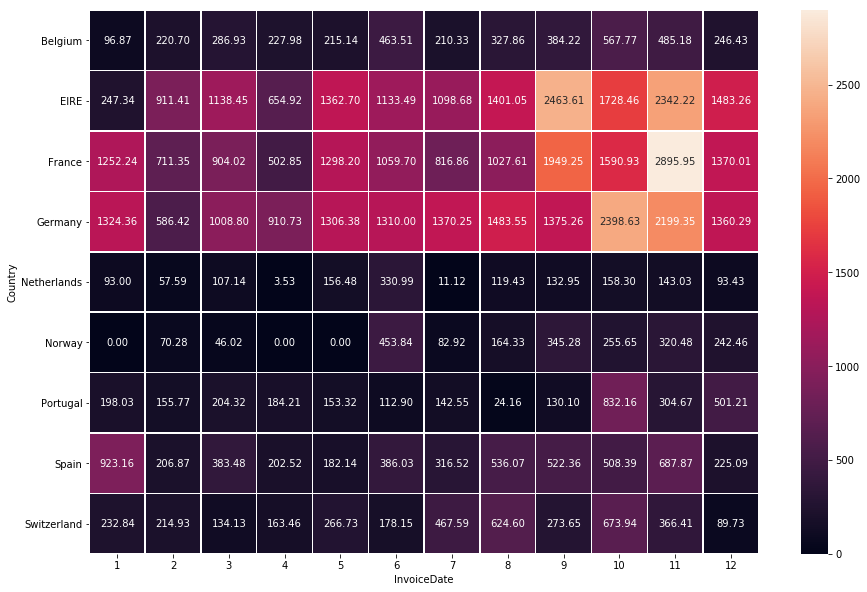

In [423]:
#your code

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(country_data9, annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

5. (d) Compare the amount of the purchases over time and between each country. 

Your answer: 

The heatmap shows similar results as the stream graph. You can see clearly that again France, Germany and EIRE are the countries that spent by far the most money over the all months. Also there is again the pattern that in the months September until December the countries spent the most money. Although the pattern is not so distinct as in the steam graph.

Another thing you can notice is that most of the countries have a month where they spent much more money than in the other month (i.e. a spike). For example for Spain it is the month of January where they spent £923.16, for Portugal it is October with £832.16 and for Germany it is November with £2895.95.

### Question 6 (Interpretation)
Compare the results obtained from the stream graph and the heat map. Is there a relation between the number of purchases and the amount purchased in sterling?


Your answer: 

Yes, there is clearly a relation between the number of purchases and the amount purchased in sterling. Both graphs show clearly that Germany, France and EIRE have made the most purchases overall and therefore also spent the most money. Also you can see the same pattern that more things are purchased between the months September and December than in the other months and also that the most money is spent in these months. Especially for the month of November you can see this as it is the month when most of the purchases were made and the most money was spent. There is clearly a linear relationship between these two values visible. If the one value goes up, most certainly the other value goes also up.

# Clustering
Presume that the business analyst would like to cluster transactions with similar types of products into the same group (here don’t consider the quantity of the products). For each product, only use its ‘StockCode’ to represent it. All the results here should be based on the preprocessed data set obtained from question 1 to 3 of this assignment. Presume that this obtained data set from question 1 to 3 has a variable name ‘cluster_dataset’ and is expressed by Pandas DataFrame in your code.

### Question 7 (Data transformation and clustering)
7. (a) Calculate and show the number of occurrences of each product in data set   ‘cluster_dataset’. For example, if a product appears in a transaction, then its occurrence number will be increased by 1 (do not consider the quantity of this product here). Preserve the 100 most frequent products and remove all the other products in ‘cluster_dataset’. For example, if a row in ‘cluster_dataset’ contains unqualified product, then remove this row from ‘cluster_dataset’. Show the new ‘cluster_dataset’ in your result.


In [424]:
# your code
cluster_dataset = cleaned_data
product_occurrences = cluster_dataset['StockCode'].astype(str).value_counts()

print(product_occurrences)

85123A    1878
85099B    1818
20725     1455
47566     1296
20727     1266
22383     1263
22457     1208
23203     1145
22382     1137
22720     1125
22386     1122
20728     1119
22411     1117
21931     1114
84879     1090
22469     1076
22384     1070
22666     1063
23209     1051
22960     1043
82482     1038
22727     1026
22961     1020
23206     1012
22197     1004
20726     1004
22086     1003
23298      993
22993      985
22699      968
          ... 
21160        1
90135A       1
90024C       1
85031B       1
90068        1
35610C       1
46776e       1
84569C       1
35833G       1
90126C       1
90026C       1
90112        1
90043        1
84971l       1
90102        1
84613C       1
22946        1
84614A       1
84206B       1
35597A       1
90049        1
77079        1
62096B       1
90092        1
85119        1
46776a       1
90060B       1
23545        1
21009        1
90048        1
Name: StockCode, Length: 3654, dtype: int64


In [425]:
top100 = product_occurrences[:100]
cluster_dataset = cluster_dataset[cluster_dataset['StockCode'].astype(str).isin(top100.index)]
cluster_dataset = cluster_dataset.drop_duplicates(subset = ['InvoiceNo','StockCode'])

cluster_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.56,17850.0,United Kingdom
15,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.93,13047.0,United Kingdom
19,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.24,13047.0,United Kingdom
24,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
31,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.56,17850.0,United Kingdom


7. (b) Based on question a, please reorganize the data from ‘cluster_dataset’ and generate a new data set ‘cluster_dataset_new’ which has a suitable format (for k-means) for solving the transaction clustering problem mentioned above. Show the data from ‘cluster_dataset_new’ by using Pandas DataFrame in your result, where the index should be consistent with the values of 'InvoiceNo', the column name should be consistent with the values of 'StockCode' and each element in this DataFrame should have a value 0 or 1.

In [426]:
# your code
cluster_dataset_new = pd.crosstab(cluster_dataset['InvoiceNo'], cluster_dataset['StockCode'])

cluster_dataset_new

StockCode,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
536375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
536378,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
536381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


7. (c) Try values 2, 3, 4, 5 for parameter 'n_clusters' for the k-means function from Scikit-Learn over the data set ‘cluster_dataset_new’ generated in question b. Show the ‘within cluster variation’ (also called ‘sum of squared distances’) of the generated clusters for each different setting for ‘n_clusters’ in your result. Also write down the value that you have tried for setting 'n_clusters' which can help generate the best clustering results and explain how you make this decision.

In [427]:
# your code
from sklearn.cluster import KMeans

for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters).fit(cluster_dataset_new)
    cluster_variation = kmeans.inertia_
    print('n_clusters=', n_clusters, ', within cluster variation=',cluster_variation)

n_clusters= 2 , within cluster variation= 73194.2657052976
n_clusters= 3 , within cluster variation= 71032.35570743411
n_clusters= 4 , within cluster variation= 69688.88917699721
n_clusters= 5 , within cluster variation= 68002.72469892401


Your explanation:

Using 5 for the 'n_clusters' parameter gets the best clustering results, because it has the lowest within cluster variation.

# Frequent Itemsets and Association Rules
 For the clusters output by k-means function with the best 'n_clusters' from question 7, the business analyst now would like to research on the frequent purchase behaviours and specific purchase rules for each cluster.
### Question 8 (Data transformation and mining frequent itemsets and association rules)
8. (a) Set the minimum support for finding the frequent purchase behaviours to 0.2. Please provide the business analyst with the qualified purchase behaviours. For each product, only use its ‘StockCode’ to represent it. Also show the data set prepared for each cluster for mining the frequent behaviours by using Pandas DataFrame in your result, the data set for the cluster k should have the variable name 'fpb_data_k' in your code.

In [428]:
# your code
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

kmeans = KMeans(5).fit(cluster_dataset_new)
clusters = kmeans.labels_

cluster_df = pd.DataFrame({'ClusterNumber': clusters}, index=cluster_dataset_new.index)
cluster_numbered = cluster_dataset_new.join(cluster_df)

fpb_data_0 = cluster_numbered[cluster_numbered['ClusterNumber'] == 0].drop(columns='ClusterNumber')
fpb_data_1 = cluster_numbered[cluster_numbered['ClusterNumber'] == 1].drop(columns='ClusterNumber')
fpb_data_2 = cluster_numbered[cluster_numbered['ClusterNumber'] == 2].drop(columns='ClusterNumber')
fpb_data_3 = cluster_numbered[cluster_numbered['ClusterNumber'] == 3].drop(columns='ClusterNumber')
fpb_data_4 = cluster_numbered[cluster_numbered['ClusterNumber'] == 4].drop(columns='ClusterNumber')

fpb_data_0.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [429]:
fpb_data_1.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
536375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
536396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
536406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [430]:
fpb_data_2.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536401,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536412,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
536542,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
536754,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
536769,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [431]:
fpb_data_3.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536544,0,0,1,0,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,0,1
536592,0,0,0,1,1,1,0,1,1,1,...,1,1,1,0,0,1,1,0,1,1
536865,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
536876,1,0,1,1,1,1,1,1,0,0,...,1,1,1,0,0,0,1,0,1,1
537237,0,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,1,1,1,1


In [432]:
fpb_data_4.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536378,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
536409,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
536464,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
536526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
536632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [433]:
frequent_itemsets_0 = apriori(fpb_data_0, min_support = 0.2, use_colnames = True)
frequent_itemsets_0['length'] = frequent_itemsets_0['itemsets'].apply(lambda x: len(x))
frequent_itemsets_0

,support,itemsets,length


In [434]:
frequent_itemsets_1 = apriori(fpb_data_1, min_support = 0.2, use_colnames = True)
frequent_itemsets_1['length'] = frequent_itemsets_1['itemsets'].apply(lambda x: len(x))
frequent_itemsets_1

,support,itemsets,length
0,0.229496,(21733),1
1,0.980576,(85123A),1
2,0.217986,"(85123A, 21733)",2


In [435]:
frequent_itemsets_2 = apriori(fpb_data_2, min_support = 0.2, use_colnames = True)
frequent_itemsets_2['length'] = frequent_itemsets_2['itemsets'].apply(lambda x: len(x))
frequent_itemsets_2

,support,itemsets,length
0,0.201587,(20724),1
1,0.569841,(20725),1
2,0.470635,(20726),1
3,0.557143,(20727),1
4,0.547619,(20728),1
5,0.567460,(22382),1
6,0.551587,(22383),1
7,0.480159,(22384),1
8,0.303968,(22662),1
9,0.205556,(23203),1


In [436]:
frequent_itemsets_3 = apriori(fpb_data_3, min_support = 0.2, use_colnames = True)
frequent_itemsets_3['length'] = frequent_itemsets_3['itemsets'].apply(lambda x: len(x))
frequent_itemsets_3

,support,itemsets,length
0,0.480818,(20712),1
1,0.429668,(20713),1
2,0.531969,(20719),1
3,0.406650,(20723),1
4,0.539642,(20724),1
5,0.457801,(20725),1
6,0.350384,(20726),1
7,0.332481,(20727),1
8,0.255754,(20728),1
9,0.304348,(20914),1


In [437]:
frequent_itemsets_4 = apriori(fpb_data_4, min_support = 0.2, use_colnames = True)
frequent_itemsets_4['length'] = frequent_itemsets_4['itemsets'].apply(lambda x: len(x))
frequent_itemsets_4

,support,itemsets,length
0,0.327797,(20712),1
1,0.205420,(20713),1
2,0.338287,(21928),1
3,0.304196,(21929),1
4,0.224650,(21930),1
5,0.467657,(21931),1
6,0.252622,(22385),1
7,0.527972,(22386),1
8,0.473776,(22411),1
9,0.244755,(23199),1


In [438]:
from mlxtend.frequent_patterns import association_rules as arule

# frequent_itemset_0 has no elements
rules_association_1 = arule(frequent_itemsets_1, metric='confidence', min_threshold = 0.7)
rules_association_2 = arule(frequent_itemsets_2, metric='confidence', min_threshold = 0.7)
rules_association_3 = arule(frequent_itemsets_3, metric='confidence', min_threshold = 0.7)
#rules_association_4 = arule(frequent_itemsets_4, metric='confidence', min_threshold = 0.7)

rules_association_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(21733),(85123A),0.229496,0.980576,0.217986,0.949843,0.968659,-0.007053,0.387275


In [439]:
rules_association_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(22662),(22382),0.303968,0.56746,0.215079,0.707572,1.24691,0.042589,1.479131


In [440]:
rules_association_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20712),(85099B),0.480818,0.723785,0.355499,0.739362,1.021521,0.007489,1.059763
1,(20713),(22961),0.429668,0.649616,0.314578,0.732143,1.127039,0.035459,1.308099
2,(20713),(85099B),0.429668,0.723785,0.329923,0.767857,1.060891,0.018936,1.189849
3,(20723),(20719),0.406650,0.531969,0.294118,0.723270,1.359609,0.077793,1.691293
4,(22726),(20719),0.312020,0.531969,0.225064,0.721311,1.355927,0.059079,1.679404
5,(20719),(85099B),0.531969,0.723785,0.401535,0.754808,1.042862,0.016503,1.126523
6,(20723),(20724),0.406650,0.539642,0.306905,0.754717,1.398551,0.087460,1.876844
7,(20723),(22355),0.406650,0.511509,0.286445,0.704403,1.377107,0.078440,1.652555
8,(20723),(85099B),0.406650,0.723785,0.306905,0.754717,1.042736,0.012578,1.126107
9,(22356),(20724),0.462916,0.539642,0.340153,0.734807,1.361656,0.090345,1.735934


In [441]:
#rules_association_4

8. (b) Furthermore, the business analyst would like to analyze the purchase behaviour of the citizens from ‘United Kingdom’ for each cluster. Specifically speaking, he wants to discover if there exist some rules which indicate that the citizens from ‘United Kingdom’ tend to buy some specific products for each cluster. Set the minimum support to 0.2, minimum confidence to 0.7. Please discover and show such rules (only show the rules with ‘United Kingdom’ appearing in antecedents in the rules) for each cluster for the business analyst. Also show the data sets prepared for each cluster for mining the relevant rules by using Pandas DataFrame in you result, the data set for cluster k should have the variable name 'r_data_k' in your code.

In [442]:
# your code

# add Country coloumn to 'cluster_dataset_new'

cluster_dataset_country = pd.crosstab(cluster_dataset.InvoiceNo,cluster_dataset.Country).clip_upper(1)
cluster_dataset_country = cluster_dataset_new.join(cluster_dataset_country)
cluster_dataset_country

kmeans = KMeans(5).fit(cluster_dataset_country)
clusters = kmeans.labels_

cluster_df = pd.DataFrame({'ClusterNumber': clusters}, index=cluster_dataset_country.index)
cluster_dataset_country_numbered = cluster_dataset_country.join(cluster_df)

r_data_0 = cluster_dataset_country_numbered[cluster_dataset_country_numbered['ClusterNumber'] == 0].drop(columns='ClusterNumber')
r_data_1 = cluster_dataset_country_numbered[cluster_dataset_country_numbered['ClusterNumber'] == 1].drop(columns='ClusterNumber')
r_data_2 = cluster_dataset_country_numbered[cluster_dataset_country_numbered['ClusterNumber'] == 2].drop(columns='ClusterNumber')
r_data_3 = cluster_dataset_country_numbered[cluster_dataset_country_numbered['ClusterNumber'] == 3].drop(columns='ClusterNumber')
r_data_4 = cluster_dataset_country_numbered[cluster_dataset_country_numbered['ClusterNumber'] == 4].drop(columns='ClusterNumber')

r_data_0.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [443]:
r_data_1.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [444]:
r_data_2.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536544,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
536592,0,0,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
536865,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536876,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
537237,0,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [445]:
r_data_3.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536401,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536404,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
536412,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
536542,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
536754,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [446]:
r_data_4.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536378,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536409,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [447]:
frequent_itemsets_country_0 = apriori(r_data_0, min_support = 0.2, use_colnames = True)
frequent_itemsets_country_0['length'] = frequent_itemsets_country_0['itemsets'].apply(lambda x: len(x))
frequent_itemsets_country_0

,support,itemsets,length
0,0.229331,(21733),1
1,0.980590,(85123A),1
2,0.956147,(United Kingdom),1
3,0.217829,"(85123A, 21733)",2
4,0.217829,"(United Kingdom, 21733)",2
5,0.936736,"(85123A, United Kingdom)",2
6,0.206326,"(85123A, United Kingdom, 21733)",3


In [448]:
frequent_itemsets_country_1 = apriori(r_data_1, min_support = 0.2, use_colnames = True)
frequent_itemsets_country_1['length'] = frequent_itemsets_country_1['itemsets'].apply(lambda x: len(x))
frequent_itemsets_country_1

,support,itemsets,length
0,0.889082,(United Kingdom),1


In [449]:
frequent_itemsets_country_2 = apriori(r_data_2, min_support = 0.2, use_colnames = True)
frequent_itemsets_country_2['length'] = frequent_itemsets_country_2['itemsets'].apply(lambda x: len(x))
frequent_itemsets_country_2

,support,itemsets,length
0,0.480720,(20712),1
1,0.426735,(20713),1
2,0.534704,(20719),1
3,0.403599,(20723),1
4,0.537275,(20724),1
5,0.460154,(20725),1
6,0.352185,(20726),1
7,0.334190,(20727),1
8,0.257069,(20728),1
9,0.305913,(20914),1


In [450]:
frequent_itemsets_country_3 = apriori(r_data_3, min_support = 0.2, use_colnames = True)
frequent_itemsets_country_3['length'] = frequent_itemsets_country_3['itemsets'].apply(lambda x: len(x))
frequent_itemsets_country_3

,support,itemsets,length
0,0.201747,(20724),1
1,0.567117,(20725),1
2,0.470214,(20726),1
3,0.555997,(20727),1
4,0.547260,(20728),1
5,0.570294,(22382),1
6,0.552025,(22383),1
7,0.482129,(22384),1
8,0.303415,(22662),1
9,0.205719,(23203),1


In [451]:
frequent_itemsets_country_4 = apriori(r_data_4, min_support = 0.2, use_colnames = True)
frequent_itemsets_country_4['length'] = frequent_itemsets_country_4['itemsets'].apply(lambda x: len(x))
frequent_itemsets_country_4

,support,itemsets,length
0,0.329834,(20712),1
1,0.209099,(20713),1
2,0.339458,(21928),1
3,0.307087,(21929),1
4,0.229221,(21930),1
5,0.472441,(21931),1
6,0.254593,(22385),1
7,0.527559,(22386),1
8,0.475066,(22411),1
9,0.248469,(23199),1


In [452]:
from mlxtend.frequent_patterns import association_rules as arule

# association_rules
rules_association_country_0 = arule(frequent_itemsets_country_0, metric = 'confidence', min_threshold = 0.7)
rules_association_country_1 = arule(frequent_itemsets_country_1, metric = 'confidence', min_threshold = 0.7)
rules_association_country_2 = arule(frequent_itemsets_country_2, metric = 'confidence', min_threshold = 0.7)
rules_association_country_3 = arule(frequent_itemsets_country_3, metric = 'confidence', min_threshold = 0.7)
rules_association_country_4 = arule(frequent_itemsets_country_4, metric = 'confidence', min_threshold = 0.7)

# only containing 'United Kingdom' in antecedents column
rules_association_country_0[rules_association_country_0['antecedents'].apply(lambda x: 'United Kingdom' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(United Kingdom),(85123A),0.956147,0.98059,0.936736,0.979699,0.999092,-0.000851,0.956147
5,"(United Kingdom, 21733)",(85123A),0.217829,0.98059,0.206326,0.947195,0.965944,-0.007274,0.367586


In [453]:
# only containing 'United Kingdom' in antecedents column
rules_association_country_1[rules_association_country_1['antecedents'].apply(lambda x: 'United Kingdom' in x)]

""


In [454]:
# only containing 'United Kingdom' in antecedents column
rules_association_country_2[rules_association_country_2['antecedents'].apply(lambda x: 'United Kingdom' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
194,(United Kingdom),(85099B),1.000000,0.724936,0.724936,0.724936,1.000000,0.000000,1.000000
260,"(20712, United Kingdom)",(85099B),0.480720,0.724936,0.354756,0.737968,1.017977,0.006265,1.049735
296,"(20713, United Kingdom)",(22961),0.426735,0.652956,0.316195,0.740964,1.134783,0.037556,1.339750
300,"(20713, United Kingdom)",(85099B),0.426735,0.724936,0.329049,0.771084,1.063659,0.019693,1.201597
314,"(20723, United Kingdom)",(20719),0.403599,0.534704,0.295630,0.732484,1.369886,0.079824,1.739319
405,"(United Kingdom, 22726)",(20719),0.313625,0.534704,0.226221,0.721311,1.348991,0.058525,1.669590
426,"(United Kingdom, 20719)",(85099B),0.534704,0.724936,0.403599,0.754808,1.041206,0.015973,1.121831
440,"(20723, United Kingdom)",(20724),0.403599,0.537275,0.303342,0.751592,1.398897,0.086498,1.862764
454,"(20723, United Kingdom)",(22355),0.403599,0.511568,0.285347,0.707006,1.382038,0.078879,1.667039
467,"(20723, United Kingdom)",(85099B),0.403599,0.724936,0.305913,0.757962,1.045557,0.013329,1.136450


In [455]:
# only containing 'United Kingdom' in antecedents column
rules_association_country_3[rules_association_country_3['antecedents'].apply(lambda x: 'United Kingdom' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [456]:
# only containing 'United Kingdom' in antecedents column
rules_association_country_4[rules_association_country_4['antecedents'].apply(lambda x: 'United Kingdom' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,(United Kingdom),(85099B),0.934383,0.790026,0.734908,0.786517,0.995558,-0.003279,0.983561
24,"(20712, United Kingdom)",(85099B),0.293963,0.790026,0.217848,0.741071,0.938034,-0.014391,0.810933
26,"(21928, United Kingdom)",(85099B),0.323710,0.790026,0.251094,0.775676,0.981835,-0.004645,0.936028
29,"(21929, United Kingdom)",(85099B),0.287839,0.790026,0.210849,0.732523,0.927213,-0.016552,0.785016
34,"(21931, United Kingdom)",(85099B),0.449694,0.790026,0.333333,0.741245,0.938254,-0.021937,0.811478
39,"(22386, United Kingdom)",(85099B),0.502187,0.790026,0.396325,0.789199,0.998952,-0.000416,0.996074
43,"(22411, United Kingdom)",(85099B),0.460192,0.790026,0.358705,0.779468,0.986635,-0.004859,0.952122
47,"(23203, United Kingdom)",(85099B),0.263342,0.790026,0.206474,0.784053,0.992439,-0.001573,0.972340
50,"(United Kingdom, 85099C)",(85099B),0.361330,0.790026,0.281715,0.779661,0.986880,-0.003745,0.952958
53,"(21931, 22411, United Kingdom)",(85099B),0.267717,0.790026,0.205599,0.767974,0.972087,-0.005904,0.904957


# Text Mining
### Question 12 (Model based on binary document-term matrix)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier.

In [457]:
# nltk's default stoplist:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer, PorterStemmer

stoplist = set(stopwords.words('english'))
column_names = ['target','data']
pg_train = pd.read_csv("./Assignment2 Datasets/pg_train.csv", sep="#", encoding='ISO-8859-1', names=column_names)
pg_test = pd.read_csv("./Assignment2 Datasets/pg_test.csv", sep="#", encoding='ISO-8859-1', names=column_names)

# stemming the data
snowball_stemmer = SnowballStemmer('english', ignore_stopwords=True)
pg_train_stemmed = pg_train
pg_test_stemmed = pg_test

for i in range(len(pg_train.data)):
    wordlist = pg_train.data[i].split(' ')
    pg_train_stemmed.data[i] = ' '.join([snowball_stemmer.stem(word) for word in wordlist])
    
for i in range(len(pg_test.data)):
    wordlist = pg_test.data[i].split(' ')
    pg_test_stemmed.data[i] = ' '.join([snowball_stemmer.stem(word) for word in wordlist])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/philipp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [458]:
# imports
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

text_clf_binary = Pipeline([('vect', CountVectorizer(binary=True,lowercase=True,stop_words=stoplist)), 
                            ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42))])

text_clf_binary = text_clf_binary.fit(pg_train_stemmed.data, pg_train_stemmed.target)

/home/philipp/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Question 13 (Model based on document-term matrix of counts)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier.


In [459]:
# your code

# binary document-term matrix and classifier
# lowercase, tokenized, no punctuation and stopwords included in CountVectorizer

text_clf_counts = Pipeline([('vect', CountVectorizer(binary=False,lowercase=True,stop_words=stoplist)), 
                            ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42))])
text_clf_counts = text_clf_counts.fit(pg_train_stemmed.data, pg_train_stemmed.target)

/home/philipp/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Question 14 (Model based on tf-idf document-term matrix)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [460]:
# your code

# binary document-term matrix and classifier
# lowercase, tokenized, no punctuation and stopwords included in CountVectorizer

text_clf_tfidf = Pipeline([('vect', CountVectorizer(binary=False,lowercase=True,stop_words=stoplist)),
                            ('tf-idf', TfidfTransformer()),
                            ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42))])
text_clf_tfidf = text_clf_tfidf.fit(pg_train_stemmed.data, pg_train_stemmed.target)

/home/philipp/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Question 15 (Model based on doc2vec)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier.


In [461]:
# imports
import gensim
from nltk.stem.snowball import SnowballStemmer, PorterStemmer

# preprocessing
pg_train_tagged = []
pg_test_tagged = []

for i in range (0, len(pg_train.data)):
    # all lowercase, no punctuation, tokenization
    words = gensim.utils.simple_preprocess(pg_train.data[i])
    # stopword removal
    words_swRm = [x for x in words if x not in stoplist]
    # stemming
    words_swRM_stemmed = [snowball_stemmer.stem(word) for word in words_swRm]
    
    pg_train_tagged.append(gensim.models.doc2vec.TaggedDocument(words=words_swRM_stemmed, tags=[pg_train.target[i]]))

for i in range (0, len(pg_test.data)):
    # all lowercase, no punctuation, tokenization
    words = gensim.utils.simple_preprocess(pg_test.data[i])
    # stopword removal
    words_swRm = [x for x in words if x not in stoplist]
    # stemming
    words_swRM_stemmed = [snowball_stemmer.stem(word) for word in words_swRm]
    
    pg_test_tagged.append(gensim.models.doc2vec.TaggedDocument(words=words_swRM_stemmed, tags=[pg_test.target[i]]))

In [462]:
import multiprocessing

cores = multiprocessing.cpu_count()

from gensim.models import Doc2Vec
from tqdm import tqdm

doc2vec_model = Doc2Vec(dm=0, vector_size=40, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
doc2vec_model.build_vocab([x for x in tqdm(pg_train_tagged)])

# Training the doc2vec model
from sklearn import utils

for epoch in range(30):
    doc2vec_model.train(utils.shuffle([x for x in tqdm(pg_train_tagged)]), total_examples=len(pg_train_tagged), epochs=1)
    doc2vec_model.alpha -= 0.002
    doc2vec_model.min_alpha = doc2vec_model.alpha

    

100%|██████████| 4499/4499 [00:00<00:00, 1935203.95it/s]


In [463]:
def vec_for_learning(model, tagged_docs):
    targets, doc2vec_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in tagged_docs])
    return targets, doc2vec_vectors

y_train, X_train = vec_for_learning(doc2vec_model, pg_train_tagged)
y_test, X_test = vec_for_learning(doc2vec_model, pg_test_tagged)

# classifier
text_clf_doc2vec = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42)
text_clf_doc2vec.fit(X_train, y_train)

/home/philipp/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=3,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

### Question 16 (Evaluation)
16. (a) Predict the classification with the four models on the test data.


In [464]:
# your code
clf_binary_predicted = text_clf_binary.predict(pg_test_stemmed.data)
clf_counts_predicted = text_clf_counts.predict(pg_test_stemmed.data)
clf_tfidf_predicted = text_clf_tfidf.predict(pg_test_stemmed.data)
clf_doc2vec_predicted = text_clf_doc2vec.predict(X_test)

16. (b) Obtain confusion matrices for the four different models.


In [465]:
# your code

from sklearn.metrics import  confusion_matrix

print('Confusion Matrices:')
print('\nModel based on binary document-term matrix:')
print(confusion_matrix(pg_test_stemmed.target.values, clf_binary_predicted))
print('\nModel based on document-term matrix of counts:')
print(confusion_matrix(pg_test_stemmed.target.values, clf_counts_predicted))
print('\nModel based on tf-idf document-term matrix:')
print(confusion_matrix(pg_test_stemmed.target.values, clf_tfidf_predicted))
print('\nModel based on doc2vec:')
print(confusion_matrix(pg_test_stemmed.target.values, clf_doc2vec_predicted))

Confusion Matrices:

Model based on binary document-term matrix:
[[679   9   1]
 [ 13 501   1]
 [  0   0 301]]

Model based on document-term matrix of counts:
[[679   7   3]
 [ 16 497   2]
 [  3   2 296]]

Model based on tf-idf document-term matrix:
[[681   8   0]
 [  7 508   0]
 [  0   2 299]]

Model based on doc2vec:
[[679   6   4]
 [ 17 493   5]
 [  0   0 301]]


16. (c) Obtain accuracy and f1 score for the four different models.


In [466]:
# your code

from sklearn.metrics import accuracy_score, f1_score

print('Model based on binary document-term matrix:')
print('F1-Score=',f1_score(pg_test.target.values, clf_binary_predicted,average=None))
print('Accuracy=',accuracy_score(pg_test.target.values, clf_binary_predicted, normalize=True))

print('\nModel based on document-term matrix of counts:')
print('F1-Score=',f1_score(pg_test.target.values, clf_counts_predicted,average=None))
print('Accuracy=',accuracy_score(pg_test.target.values, clf_counts_predicted, normalize=True))

print('\nModel based on tf-idf document-term matrix:')
print('F1-Score=',f1_score(pg_test.target.values, clf_tfidf_predicted,average=None))
print('Accuracy=',accuracy_score(pg_test.target.values, clf_tfidf_predicted, normalize=True))

print('\nModel based on doc2vec:')
print('F1-Score=',f1_score(pg_test.target.values, clf_doc2vec_predicted,average=None))
print('Accuracy=',accuracy_score(pg_test.target.values, clf_doc2vec_predicted, normalize=True))

Model based on binary document-term matrix:
F1-Score= [0.9833454  0.97756098 0.99668874]
Accuracy= 0.9840531561461794

Model based on document-term matrix of counts:
F1-Score= [0.97909156 0.97355534 0.9833887 ]
Accuracy= 0.9780730897009967

Model based on tf-idf document-term matrix:
F1-Score= [0.98910675 0.98354308 0.99666667]
Accuracy= 0.988704318936877

Model based on doc2vec:
F1-Score= [0.98050542 0.97238659 0.98527005]
Accuracy= 0.9787375415282392


16. (d) Briefly comment on the quality of the predictions for the four models.

_Your comment:_

Overall the quality of all the predictions is very good, because they all have an accuracy higher than 97,6%.
If I would have to rate the models, I would put them in the following order:
tf-idf document-term matrix, binary document-term matrix, document-term matrix of counts, doc2vec. 

The tf-idf model is the best, because it has the highest accurary and F1-Scores, which can also be seen again in the confusion matrix with the most zero values which is very good.
The doc2vec model was the worst because it classified the most first classes as the second class with 22 misclassifications.

# Process Mining
For this part, refer to the online docs of pm4py. You will find particularly of interest the documentation on filtering (https://pm4py.github.io/filtering.html, or on the new website http://pm4py.pads.rwth-aachen.de/documentation/filtering-logs/). 
important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade` from any terminal emulator on Windows  (command prompt, PowerShell, etc) or any terminal on *nix systems. For the details, refer to the study guide and the Process Mining instruction.
### Question 17 (Trace frequency)
17. (a) Use the provided event log and identify the least frequent traces and the most frequent traces.


In [467]:
# your code
from pm4py.objects.log.importer.xes import factory as xes_importer

log = xes_importer.import_log('./Assignment2 Datasets/event_log.xes')

In [468]:
from pm4py.statistics.traces.tracelog import case_statistics

variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

print('Least frequent traces:')
print(variants_count[-1]['variant'], '\t\t\t\tCount:', variants_count[-1]['count'])
print(variants_count[-2]['variant'], '\t\tCount:', variants_count[-2]['count'])
print('\nMost frequent traces:')
print(variants_count[0]['variant'], '\t\t\t\tCount:', variants_count[0]['count'])
print(variants_count[1]['variant'], '\t\tCount:', variants_count[1]['count'])

Least frequent traces:
Assigned Severity,Under Processing,Waiting,Solves,Closed 				Count: 2251
Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed 		Count: 2568

Most frequent traces:
Assigned Severity,Waiting,Under Processing,Solves,Closed 				Count: 12188
Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed 		Count: 10614


### Question 18 (Process Discovery and Conformance Checking using first filtered event log)
18. (a) Remove the two least frequent traces and create a new event log out of the original event log without the two least frequent traces.

In [469]:
from pm4py.algo.filtering.tracelog.variants import variants_filter
from pm4py.statistics.traces.tracelog import case_statistics

variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

least_frequent_trace = [variants_count[-1]['variant']]
second_least_frequent_trace = [variants_count[-2]['variant']]

print(least_frequent_trace)
print(second_least_frequent_trace)

filtered_log2 = variants_filter.apply(log, least_frequent_trace, parameters={"positive": False})
filtered_log3 = variants_filter.apply(filtered_log2, second_least_frequent_trace, parameters={"positive": False})

['Assigned Severity,Under Processing,Waiting,Solves,Closed']
['Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed']


18. (b) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without two least frequent traces).


In [470]:
# your code
from pm4py.algo.discovery.inductive import factory as inductive_miner

tree = inductive_miner.apply_tree(filtered_log3)

# Mining for a Petri net
net, initial_marking, final_marking = inductive_miner.apply(filtered_log3)

18. (c) Do the token replay conformance checking using your discovered model and the original event log. Does your process model fit?


In [471]:
# your code
# Computing trace fitness
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory

token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
all_traces = 0
traces_that_fit = 0
average_trace_fitness = 0
for trace in token_replay_result:
    if trace['trace_is_fit']:
        traces_that_fit = traces_that_fit + 1
    all_traces = all_traces + 1
    average_trace_fitness = average_trace_fitness + trace['trace_fitness']
    
print('Number of all traces:', all_traces)
print('Number of traces that completely fit the model:', traces_that_fit)
print('Number of traces that do not fit the model:', all_traces - traces_that_fit)
print('Average fitness value of all traces:', average_trace_fitness / all_traces)

Number of all traces: 27621
Number of traces that completely fit the model: 22802
Number of traces that do not fit the model: 4819
Average fitness value of all traces: 0.9422531165900576


Your explanation: Our process model does not quite fit. Out of 27621 traces of the log the majority of the traces fit, but there are 4819 traces that do not fit the model. The average fitness value of all traces is 0.94.

18. (ci) Calculate the fitness of your model.

In [472]:
# your code

from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

log_fitness = replay_fitness_factory.evaluate(token_replay_result, variant="token_replay")
print(log_fitness)

{'perc_fit_traces': 82.55312986495782, 'average_trace_fitness': 0.9422531165900576, 'log_fitness': 0.9681466352032891}


18. (cii) Are there any deviations between the process model and the event log?

In [473]:
deviations = []
for trace in token_replay_result:
    if trace['transitions_with_problems']: # If list is not empty
        deviations.append(trace['transitions_with_problems'])
        
print('Number of deviations:', len(deviations))
print(deviations)

Number of deviations: 4819
[[Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Processing], [Under Proce

Your explanation: 

Yes. Because we deleted the two least frequent traces out of the original event log our created process model deviates from the event log. In other words, we didn't consider the two least frequent traces of the event log when we created the process model, so obviously the process model doesn't quite fit. For 4819 traces there were deviations at the transition 'Under Processing'.

### Question 19 (Process Discovery and Conformance Checking using second filtered event log)
19. (a) Now use the original event log and remove the two most frequent traces, and discover the model based on your new event log(the filtered log without two most frequent traces).


In [474]:
# your code

variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

most_frequent_trace = [variants_count[0]['variant']]
second_most_frequent_trace = [variants_count[1]['variant']]

print(most_frequent_trace)
print(second_most_frequent_trace)

filtered_log2 = variants_filter.apply(log, most_frequent_trace, parameters={"positive": False})
filtered_log3 = variants_filter.apply(filtered_log2, second_most_frequent_trace, parameters={"positive": False})

tree = inductive_miner.apply_tree(filtered_log3)

# Mining for a Petri net
net, initial_marking, final_marking = inductive_miner.apply(filtered_log3)

['Assigned Severity,Waiting,Under Processing,Solves,Closed']
['Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed']


19. (b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [475]:
# your code
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
all_traces = 0
traces_that_fit = 0
average_trace_fitness = 0
for trace in token_replay_result:
    if trace['trace_is_fit']:
        traces_that_fit = traces_that_fit + 1
    all_traces = all_traces + 1
    average_trace_fitness = average_trace_fitness + trace['trace_fitness']
    
print('Number of all traces:', all_traces)
print('Number of traces that completely fit the model:', traces_that_fit)
print('Number of traces that do not fit the model:', all_traces - traces_that_fit)
print('Average fitness value of all traces:', average_trace_fitness / all_traces)

Number of all traces: 27621
Number of traces that completely fit the model: 4819
Number of traces that do not fit the model: 22802
Average fitness value of all traces: 0.7237302535510584


Your explanation: Now, the number of traces that fit the model and the number of traces that do not fit the model are reversed. Now the majority of the traces do not fit the model and only 4819 traces do fit the model. So this process model absolutely does not fit.

19. (bi) Calculate the fitness of your model?

In [476]:
# your code
log_fitness = replay_fitness_factory.evaluate(token_replay_result, variant="token_replay")
print(log_fitness)

{'perc_fit_traces': 17.44687013504218, 'average_trace_fitness': 0.7237302535510584, 'log_fitness': 0.8492798455914916}


19. (bii)  Is there any deviation inside the process model?

In [477]:
deviations = []
for trace in token_replay_result:
    if trace['transitions_with_problems']: # If list is not empty
        deviations.append(trace['transitions_with_problems'])
        
print('Number of deviations:', len(deviations))
print(deviations)

Number of deviations: 22802
[[Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Waiting], [Wa

Your explanation:

Yes. Because we deleted the two most frequent traces out of the original event log our created process model deviates from the event log. In other words, we didn't consider the two most frequent traces of the event log when we created the process model, so the model doesn not fit. For 22802 traces there were deviations at the transition 'Waiting'.

### Question 20 (Process Discovery using complete log)
20. (a) Use the complete event log (original event log) and discover your process model using inductive miner.


In [478]:
# your code
tree = inductive_miner.apply_tree(log)

# Mining for a Petri net
net, initial_marking, final_marking = inductive_miner.apply(log)


20. (b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [479]:
# your code
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
all_traces = 0
traces_that_fit = 0
average_trace_fitness = 0
for trace in token_replay_result:
    if trace['trace_is_fit']:
        traces_that_fit = traces_that_fit + 1
    all_traces = all_traces + 1
    average_trace_fitness = average_trace_fitness + trace['trace_fitness']
    
print('Number of all traces:', all_traces)
print('Number of traces that completely fit the model:', traces_that_fit)
print('Number of traces that do not fit the model:', all_traces - traces_that_fit)
print('Average fitness value of all traces:', average_trace_fitness / all_traces)

Number of all traces: 27621
Number of traces that completely fit the model: 27621
Number of traces that do not fit the model: 0
Average fitness value of all traces: 1.0


Your explanation: 

Now all the traces completely fit to the model. There is no trace that does not fit the model. So the average fitness value of all traces is 1.0. The process model fit.

20. (c) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Your explanation:

In the first model we didn't consider the two least frequent traces when creating the process model. In the second model we didn't consider the two most frequent traces. So in both models were traces that didn't fit to the original log. While for the first model it wasn't that crucial as the majority of the traces still fitted, but for the second model only a small part of the traces fitted. In the third/last model we considered all the traces of the original log and created the process model. The result was that the model completely fitted for all traces. So the last model is the best fitting to the original log. It's because the third model had complete knowledge of the event log as it used all traces of the original log and so it fitted the best. The other two models used a filtered version of the log.